# Tweets Analysis
> Analyzing twitter sentiment on COVID related issue from the first 6 months 

- toc: true 
- badges: true
- comments: true
- categories: [tweetanalysis]
- image: images/analysis_textdata.png

# About

This notebook is a demonstration of some of capabilities of [fastpages](https://github.com/fastai/fastpages) with notebooks.


With `fastpages` you can save your jupyter notebooks into the `_notebooks` folder at the root of your repository, and they will be automatically be converted to Jekyll compliant blog posts!


## Front Matter

The first cell in your Jupyter Notebook or markdown blog post contains front matter. Front matter is metadata that can turn on/off options in your Notebook. It is formatted like this:

```
# "My Title"
> "Awesome summary"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]
```

- Setting `toc: true` will automatically generate a table of contents
- Setting `badges: true` will automatically include GitHub and Google Colab links to your notebook.
- Setting `comments: true` will enable commenting on your blog post, powered by [utterances](https://github.com/utterance/utterances).

The title and description need to be enclosed in double quotes only if they include special characters such as a colon. More details and options for front matter can be viewed on the [front matter section](https://github.com/fastai/fastpages#front-matter-related-options) of the README.

## Add the libraries and the data set

In [3]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system

# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Step 1: Reading the dataset
In this step we read the .csv file that we downloaded from the Hydrator
The .csv file contains all the column and includes various meta deta, we need to identify which columns are needed here.
Since, I'll be only working with the Text column in the data. If we need to include hashtags, we add it to the columns as well


## Get the overall info from the dataset


In [4]:
## Create a dataframe with a column for tweets

## 1 Reading dataset - Toronto 
toronto_df = pd.read_csv("textdata/Toronto-dataset.csv")
toronto_df_text = toronto_df[['text']].convert_dtypes(object,str)
## And if we need hashtags as well
#df_text = toronto_df[['hashtags','text']]

## 2 Reading dataset - Chicago
chicago_df = pd.read_csv("textdata/Chicago-dataset.csv")
chicago_df_text = chicago_df[['text']].convert_dtypes(object,str)

## 3 Reading dataset - Dallas
dallas_df = pd.read_csv("textdata/Dallas-dataset.csv")
dallas_df_text = dallas_df[['text']].convert_dtypes(object,str)

## 4 Reading dataset - Houston
houston_df = pd.read_csv("textdata/Houston-dataset.csv")
houston_df_text = houston_df[['text']].convert_dtypes(object,str)

## 5 Reading dataset - LosAngeles
losangeles_df = pd.read_csv("textdata/LosAngeles-dataset.csv")
losangeles_df_text = losangeles_df[['text']].convert_dtypes(object,str)

## 6 Reading dataset - NewYork
newyork_df = pd.read_csv("textdata/NewYork-dataset.csv")
newyork_df_text = newyork_df[['text']].convert_dtypes(object,str)

## 7 Reading dataset - Philadelphia
philadelphia_df = pd.read_csv("textdata/Philadelphia-dataset.csv")
philadelphia_df_text = philadelphia_df[['text']].convert_dtypes(object,str)

## 8 Reading dataset - Phoenix
phoenix_df = pd.read_csv("textdata/Phoenix-dataset.csv")
phoenix_df_text = phoenix_df[['text']].convert_dtypes(object,str)

## 9 Reading dataset - SanAntonio
sanantonio_df = pd.read_csv("textdata/SanAntonio-dataset.csv")
sanantonio_df_text = sanantonio_df[['text']].convert_dtypes(object,str)

## 10 Reading dataset - SanDiego
sandiego_df = pd.read_csv("textdata/SanDiego-dataset.csv")
sandiego_df_text = sandiego_df[['text']].convert_dtypes(object,str)


### Checking the dataframe
We look at the over structure of the dataset
We display a small number of records to get a sense of the data

In [21]:
#toronto_df.head(5)

In [22]:
# 1 Load Toronto Tweets

#toronto_df.info()
#toronto_df.head(5)

# Create a dataframe with 'Text' column for tweets
toronto_df_text = toronto_df[['text']].convert_dtypes(object,str)
toronto_df_text['created_at'] = toronto_df[['created_at']].convert_dtypes(object,str)
toronto_df_text['place'] = toronto_df[['place']].convert_dtypes(object,str)
toronto_df_text['hashtags'] = toronto_df[['hashtags']].convert_dtypes(object,str)
        

In [23]:
# 2 Load Chicago Tweets

# Create a dataframe with 'Text' column for tweets
chicago_df_text = chicago_df[['text']].convert_dtypes(object,str)
chicago_df_text['created_at'] = chicago_df[['created_at']].convert_dtypes(object,str)
chicago_df_text['place'] = chicago_df[['place']].convert_dtypes(object,str)
chicago_df_text['hashtags'] = chicago_df[['hashtags']].convert_dtypes(object,str)
         

In [24]:
# 3 Load Dallas Tweets

# Create a dataframe with 'Text' column for tweets
dallas_df_text = dallas_df[['text']].convert_dtypes(object,str)
dallas_df_text['created_at'] = dallas_df[['created_at']].convert_dtypes(object,str)
dallas_df_text['place'] = dallas_df[['place']].convert_dtypes(object,str)
dallas_df_text['hashtags'] = dallas_df[['hashtags']].convert_dtypes(object,str)
         

In [25]:
# 4 Load Houston Tweets

# Create a dataframe with 'Text' column for tweets
houston_df_text = houston_df[['text']].convert_dtypes(object,str)
houston_df_text['created_at'] = houston_df[['created_at']].convert_dtypes(object,str)
houston_df_text['place'] = houston_df[['place']].convert_dtypes(object,str)
houston_df_text['hashtags'] = houston_df[['hashtags']].convert_dtypes(object,str)
         

In [26]:
# 5 Load LosAngeles Tweets

# Create a dataframe with 'Text' column for tweets
losangeles_df_text = losangeles_df[['text']].convert_dtypes(object,str)
losangeles_df_text['created_at'] = losangeles_df[['created_at']].convert_dtypes(object,str)
losangeles_df_text['place'] = losangeles_df[['place']].convert_dtypes(object,str)
losangeles_df_text['hashtags'] = losangeles_df[['hashtags']].convert_dtypes(object,str)
         

In [27]:
# 6 Load NewYork Tweets

# Create a dataframe with 'Text' column for tweets
newyork_df_text = newyork_df[['text']].convert_dtypes(object,str)
newyork_df_text['created_at'] = newyork_df[['created_at']].convert_dtypes(object,str)
newyork_df_text['place'] = newyork_df[['place']].convert_dtypes(object,str)
newyork_df_text['hashtags'] = newyork_df[['hashtags']].convert_dtypes(object,str)
         

In [28]:
# 7 Load Philadelphia Tweets

# Create a dataframe with 'Text' column for tweets
philadelphia_df_text = philadelphia_df[['text']].convert_dtypes(object,str)
philadelphia_df_text['created_at'] = philadelphia_df[['created_at']].convert_dtypes(object,str)
philadelphia_df_text['place'] = philadelphia_df[['place']].convert_dtypes(object,str)
philadelphia_df_text['hashtags'] = philadelphia_df[['hashtags']].convert_dtypes(object,str)
         

In [29]:
# 8 Load Phoenix Tweets

# Create a dataframe with 'Text' column for tweets
phoenix_df_text = phoenix_df[['text']].convert_dtypes(object,str)
phoenix_df_text['created_at'] = phoenix_df[['created_at']].convert_dtypes(object,str)
phoenix_df_text['place'] = phoenix_df[['place']].convert_dtypes(object,str)
phoenix_df_text['hashtags'] = phoenix_df[['hashtags']].convert_dtypes(object,str)
         

In [30]:
# 9 Load SanAntonio Tweets

# Create a dataframe with 'Text' column for tweets
sanantonio_df_text = sanantonio_df[['text']].convert_dtypes(object,str)
sanantonio_df_text['created_at'] = sanantonio_df[['created_at']].convert_dtypes(object,str)
sanantonio_df_text['place'] = sanantonio_df[['place']].convert_dtypes(object,str)
sanantonio_df_text['hashtags'] = sanantonio_df[['hashtags']].convert_dtypes(object,str)
         

In [31]:
# 9 Load SanDiego Tweets

# Create a dataframe with 'Text' column for tweets
sandiego_df_text = sandiego_df[['text']].convert_dtypes(object,str)
sandiego_df_text['created_at'] = sandiego_df[['created_at']].convert_dtypes(object,str)
sandiego_df_text['place'] = sandiego_df[['place']].convert_dtypes(object,str)
sandiego_df_text['hashtags'] = sandiego_df[['hashtags']].convert_dtypes(object,str)
         

In [32]:
#chicago_df_text.head(10)    

## Step 2: Cleaning the text Data
For this notebook, I'll be working with the text content of the tweets, so we need to separate and remove
- The emojis in between the text
- Symbols and numbers
- The 

In [33]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    #text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    #text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    #text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)
    text = re.sub('thi', '', text, flags=re.MULTILINE)
    text = re.sub('wa', '', text, flags=re.MULTILINE)
    


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [34]:
# 1 Toronto Data - pass the text through cleantweet and removeEmoji functions
# s = toronto_df_text.iloc[[2]]
toronto_df_text['text'] = toronto_df_text['text'].apply(cleanTweets)
toronto_df_text['text'] = toronto_df_text['text'].apply(cleanEmoji)
#toronto_df_text.head(2)

In [35]:
# 2 Chicago Data - pass the text through cleantweet and removeEmoji functions
chicago_df_text['text'] = chicago_df_text['text'].apply(cleanTweets)
chicago_df_text['text'] = chicago_df_text['text'].apply(cleanEmoji)


In [36]:
# 3 Dallas Data - pass the text through cleantweet and removeEmoji functions
dallas_df_text['text'] = dallas_df_text['text'].apply(cleanTweets)
dallas_df_text['text'] = dallas_df_text['text'].apply(cleanEmoji)


In [37]:
# 4 Houston Data - pass the text through cleantweet and removeEmoji functions
houston_df_text['text'] = houston_df_text['text'].apply(cleanTweets)
houston_df_text['text'] = houston_df_text['text'].apply(cleanEmoji)


In [38]:
# 5 LosAngeles Data - pass the text through cleantweet and removeEmoji functions
losangeles_df_text['text'] = losangeles_df_text['text'].apply(cleanTweets)
losangeles_df_text['text'] = losangeles_df_text['text'].apply(cleanEmoji)


In [39]:
# 6 NewYork Data - pass the text through cleantweet and removeEmoji functions
newyork_df_text['text'] = newyork_df_text['text'].apply(cleanTweets)
newyork_df_text['text'] = newyork_df_text['text'].apply(cleanEmoji)


In [40]:
# 7 philadelphia Data - pass the text through cleantweet and removeEmoji functions
philadelphia_df_text['text'] = philadelphia_df_text['text'].apply(cleanTweets)
philadelphia_df_text['text'] = philadelphia_df_text['text'].apply(cleanEmoji)


In [41]:
# 8 Phoenix Data - pass the text through cleantweet and removeEmoji functions
phoenix_df_text['text'] = phoenix_df_text['text'].apply(cleanTweets)
phoenix_df_text['text'] = phoenix_df_text['text'].apply(cleanEmoji)


In [42]:
# 9 SanAntonio Data - pass the text through cleantweet and removeEmoji functions
sanantonio_df_text['text'] = sanantonio_df_text['text'].apply(cleanTweets)
sanantonio_df_text['text'] = sanantonio_df_text['text'].apply(cleanEmoji)


In [43]:
# 10 SanDiego Data - pass the text through cleantweet and removeEmoji functions
sandiego_df_text['text'] = sandiego_df_text['text'].apply(cleanTweets)
sandiego_df_text['text'] = sandiego_df_text['text'].apply(cleanEmoji)


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [44]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [45]:
# 1 - Toronto Data - Create two new columns to add the sentiment and polarity
toronto_df_text['subjectivity'] = toronto_df_text['text'].apply(getSubjectivity)
toronto_df_text['polarity'] = toronto_df_text['text'].apply(getPolarity)


In [46]:
# 2 - Chicago Data - Create two new columns to add the sentiment and polarity
chicago_df_text['subjectivity'] = chicago_df_text['text'].apply(getSubjectivity)
chicago_df_text['polarity'] = chicago_df_text['text'].apply(getPolarity)

In [47]:
# 3 - Dallas Data - Create two new columns to add the sentiment and polarity
dallas_df_text['subjectivity'] = dallas_df_text['text'].apply(getSubjectivity)
dallas_df_text['polarity'] = dallas_df_text['text'].apply(getPolarity)

In [48]:
# 4 - Houston Data - Create two new columns to add the sentiment and polarity
houston_df_text['subjectivity'] = houston_df_text['text'].apply(getSubjectivity)
houston_df_text['polarity'] = houston_df_text['text'].apply(getPolarity)

In [49]:
# 5 - LosAngeles Data - Create two new columns to add the sentiment and polarity
losangeles_df_text['subjectivity'] = losangeles_df_text['text'].apply(getSubjectivity)
losangeles_df_text['polarity'] = losangeles_df_text['text'].apply(getPolarity)

In [50]:
# 6 - NewYork Data - Create two new columns to add the sentiment and polarity
newyork_df_text['subjectivity'] = newyork_df_text['text'].apply(getSubjectivity)
newyork_df_text['polarity'] = newyork_df_text['text'].apply(getPolarity)

In [51]:
# 7 - Philadelphia Data - Create two new columns to add the sentiment and polarity
philadelphia_df_text['subjectivity'] = philadelphia_df_text['text'].apply(getSubjectivity)
philadelphia_df_text['polarity'] = philadelphia_df_text['text'].apply(getPolarity)

In [52]:
# 8 - Phoenix Data - Create two new columns to add the sentiment and polarity
phoenix_df_text['subjectivity'] = phoenix_df_text['text'].apply(getSubjectivity)
phoenix_df_text['polarity'] = phoenix_df_text['text'].apply(getPolarity)

In [53]:
# 9 - SanAntonio Data - Create two new columns to add the sentiment and polarity
sanantonio_df_text['subjectivity'] = sanantonio_df_text['text'].apply(getSubjectivity)
sanantonio_df_text['polarity'] = sanantonio_df_text['text'].apply(getPolarity)

In [54]:
# 10 - SanDiego Data - Create two new columns to add the sentiment and polarity
sandiego_df_text['subjectivity'] = sandiego_df_text['text'].apply(getSubjectivity)
sandiego_df_text['polarity'] = sandiego_df_text['text'].apply(getPolarity)

## Make a WordCloud chart -word frequency map

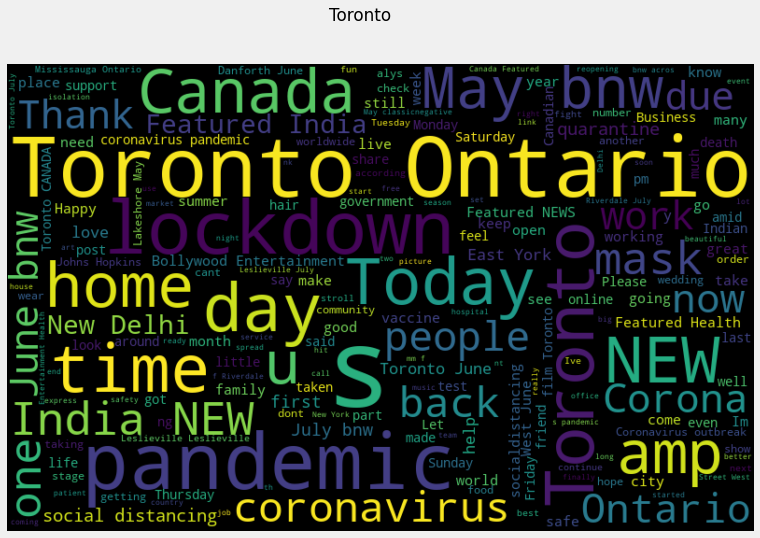

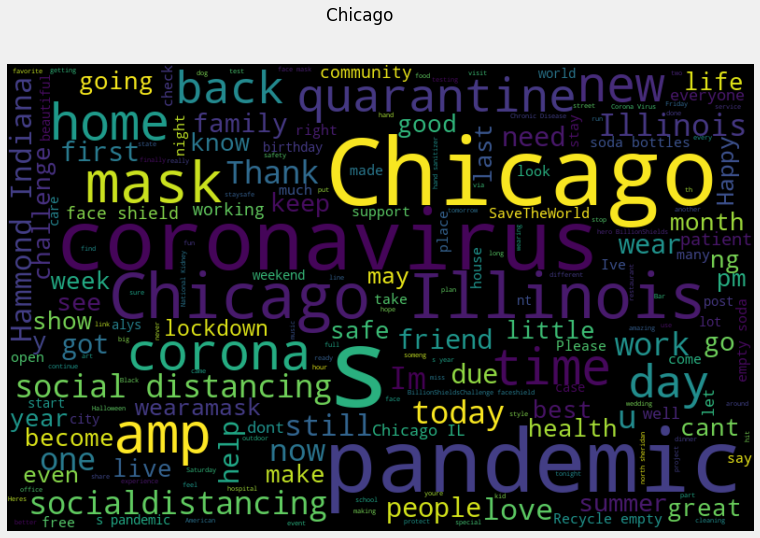

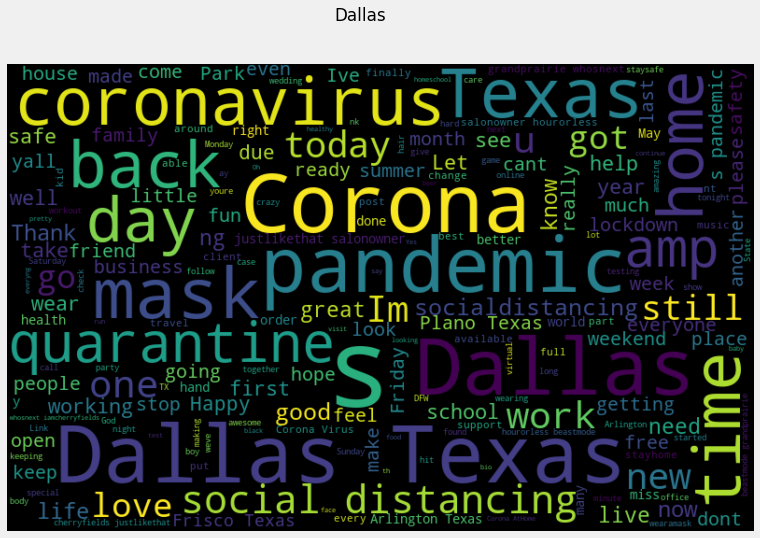

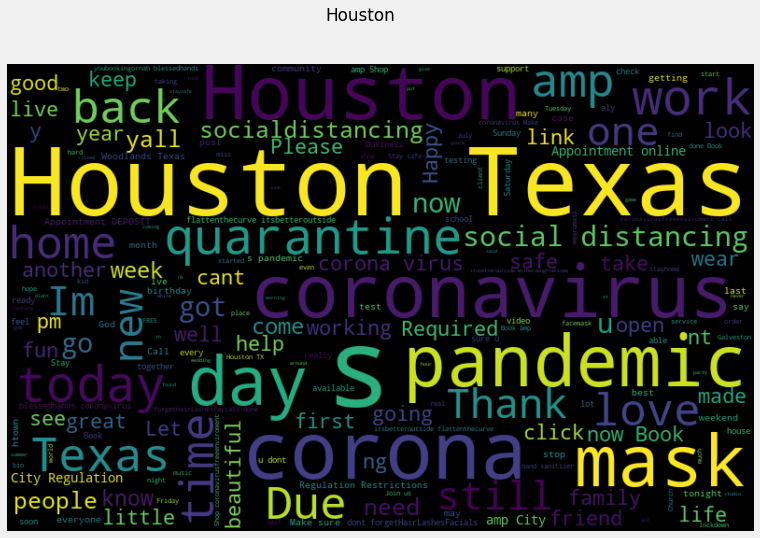

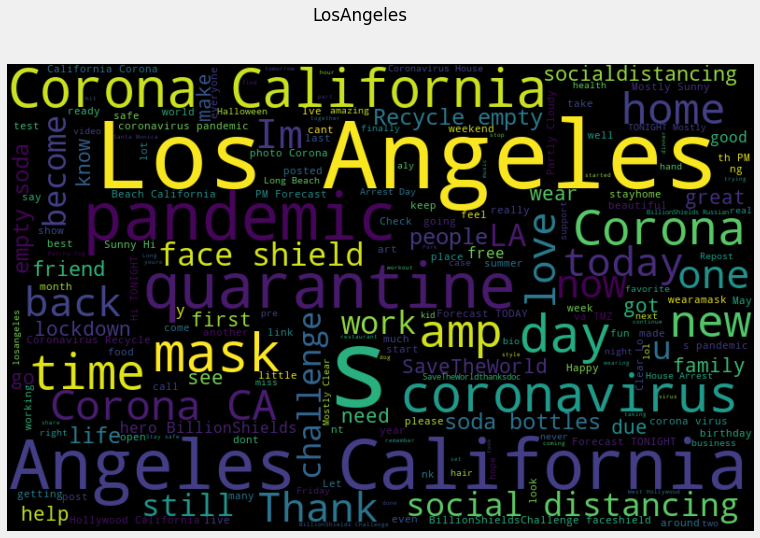

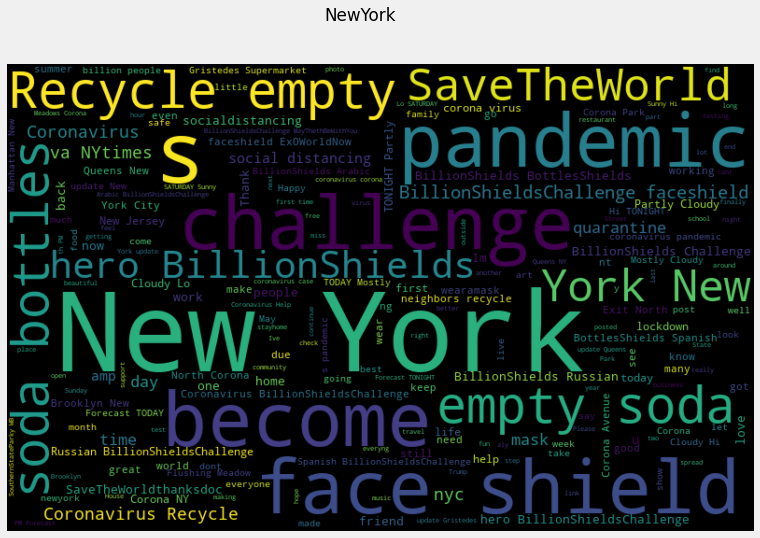

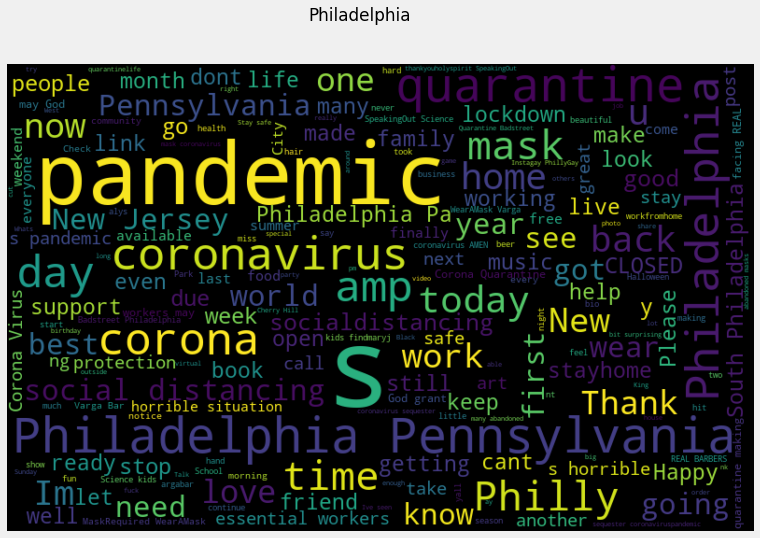

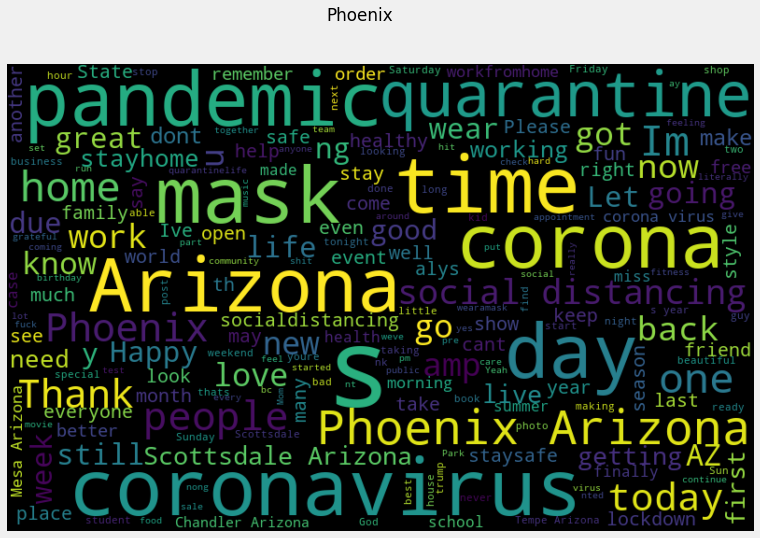

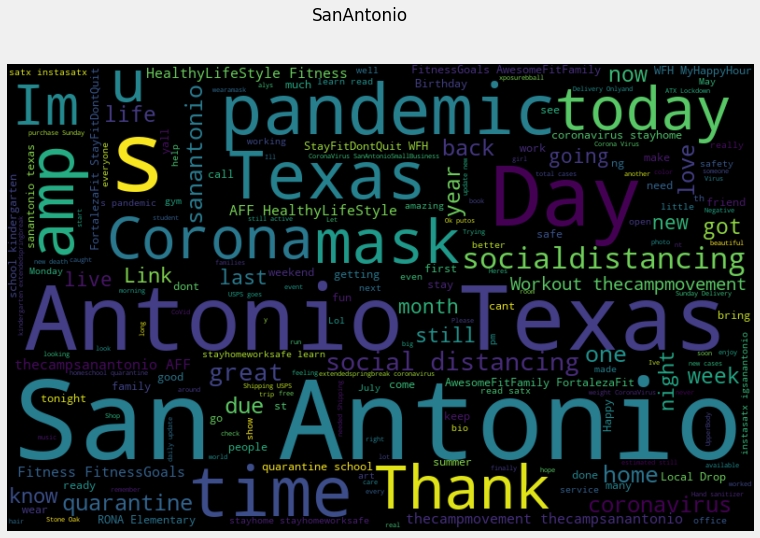

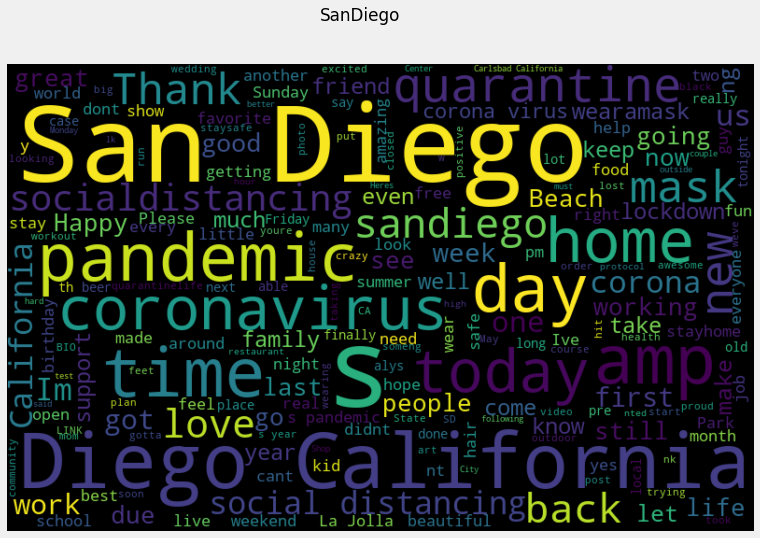

In [56]:
# plot outcome using word cloud
# visualize the most frequency used words

# prepare the tweet data
allWords_toronto = ' '.join(twts for twts in toronto_df_text['text'])
allWords_chicago = ' '.join(twts for twts in chicago_df_text['text'])
allWords_dallas = ' '.join(twts for twts in dallas_df_text['text'])
allWords_houston = ' '.join(twts for twts in houston_df_text['text'])
allWords_losangeles = ' '.join(twts for twts in losangeles_df_text['text'])
allWords_newyork = ' '.join(twts for twts in newyork_df_text['text'])
allWords_philadelphia = ' '.join(twts for twts in philadelphia_df_text['text'])
allWords_phoenix = ' '.join(twts for twts in phoenix_df_text['text'])
allWords_sanantonio = ' '.join(twts for twts in sanantonio_df_text['text'])
allWords_sandiego = ' '.join(twts for twts in sandiego_df_text['text'])


wordCloud_toronto = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_toronto)
wordCloud_chicago = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_chicago)
wordCloud_dallas = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_dallas)
wordCloud_houston = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_houston)
wordCloud_losangeles = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_losangeles)
wordCloud_newyork = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_newyork)
wordCloud_philadelphia = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_philadelphia)
wordCloud_phoenix = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_phoenix)
wordCloud_sanantonio = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_sanantonio)
wordCloud_sandiego = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_sandiego)


# 1 - Toronto wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('Toronto')
plt.imshow(wordCloud_toronto, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 2- Chicago wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('Chicago')
plt.imshow(wordCloud_chicago, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 3- Dallas wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('Dallas')
plt.imshow(wordCloud_dallas, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 4- Houston wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('Houston')
plt.imshow(wordCloud_houston, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 5- LosAngeles wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('LosAngeles')
plt.imshow(wordCloud_losangeles, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 2- NewYork wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('NewYork')
plt.imshow(wordCloud_newyork, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 2- Philadelphia wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('Philadelphia')
plt.imshow(wordCloud_philadelphia, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 2- Phoenix wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('Phoenix')
plt.imshow(wordCloud_phoenix, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 2- SanAntonio wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('SanAntonio')
plt.imshow(wordCloud_sanantonio, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# 2- SanDiego wordcloud
plt.figure(figsize=(19,8))
plt.suptitle('SanDiego')
plt.imshow(wordCloud_sandiego, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [57]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
toronto_df_text['analysis'] = toronto_df_text['polarity'].apply(getSentAnalysis)
chicago_df_text['analysis'] = chicago_df_text['polarity'].apply(getSentAnalysis)
dallas_df_text['analysis'] = dallas_df_text['polarity'].apply(getSentAnalysis)
houston_df_text['analysis'] = houston_df_text['polarity'].apply(getSentAnalysis)
losangeles_df_text['analysis'] = losangeles_df_text['polarity'].apply(getSentAnalysis)
newyork_df_text['analysis'] = newyork_df_text['polarity'].apply(getSentAnalysis)
philadelphia_df_text['analysis'] = philadelphia_df_text['polarity'].apply(getSentAnalysis)
phoenix_df_text['analysis'] = phoenix_df_text['polarity'].apply(getSentAnalysis)
sanantonio_df_text['analysis'] = sanantonio_df_text['polarity'].apply(getSentAnalysis)
sandiego_df_text['analysis'] = sandiego_df_text['polarity'].apply(getSentAnalysis)


## All Positive/Negative Tweets 

### skip this one 

In [75]:
# skip this one 
#print all of the negative tweets - Toronto
j=1
sortedDF_text = toronto_df_text.sort_values(by=['polarity'])
for i in range(0, sortedDF_text.shape[0]):
    if (sortedDF_text['analysis'][i] == 'Negative'):
       # print(str(j)+ ')' + sortedDF_text['text'][i])
       # print()
        j = j+1
        
#print all of the Positive tweets
j=1
sortedDF_text = toronto_df_text.sort_values(by=['polarity'])
for i in range(0, sortedDF_text.shape[0]):
    if (sortedDF_text['analysis'][i] == 'Positive'):
        # print(str(j)+ ')' + sortedDF_text['text'][i])
        # print()
        j = j+1        

### skip this one 

In [76]:
#print all of the negative tweets - Toronto
j=1
sortedDF_text = chicago_df_text.sort_values(by=['polarity'])
for i in range(0, sortedDF_text.shape[0]):
    if (sortedDF_text['analysis'][i] == 'Negative'):
       # print(str(j)+ ')' + sortedDF_text['text'][i])
       # print()
        j = j+1
        
#print all of the Positive tweets
j=1
sortedDF_text = chicago_df_text.sort_values(by=['polarity'])
for i in range(0, sortedDF_text.shape[0]):
    if (sortedDF_text['analysis'][i] == 'Positive'):
        # print(str(j)+ ')' + sortedDF_text['text'][i])
        # print()
        j = j+1        

## Scatter pLot - map the postitive-negative distribution

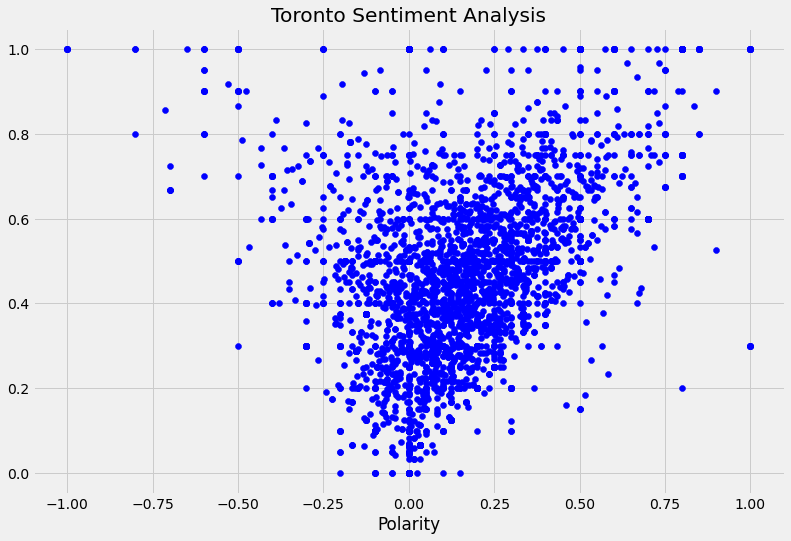

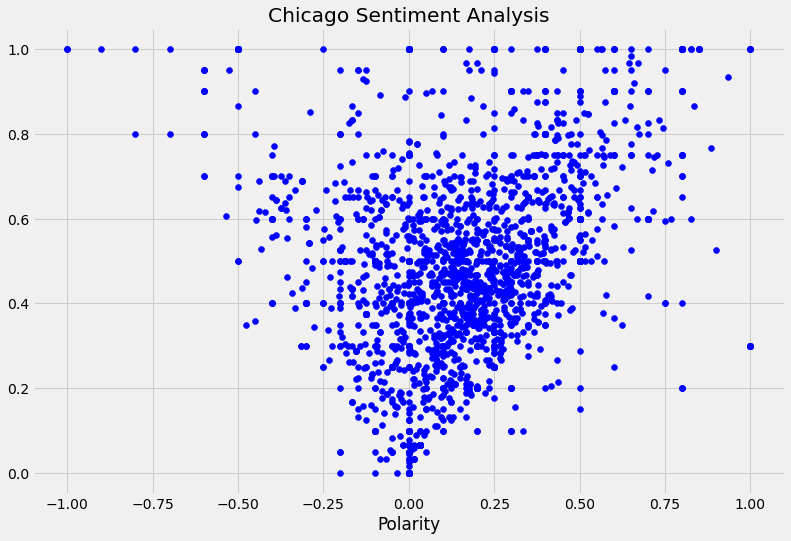

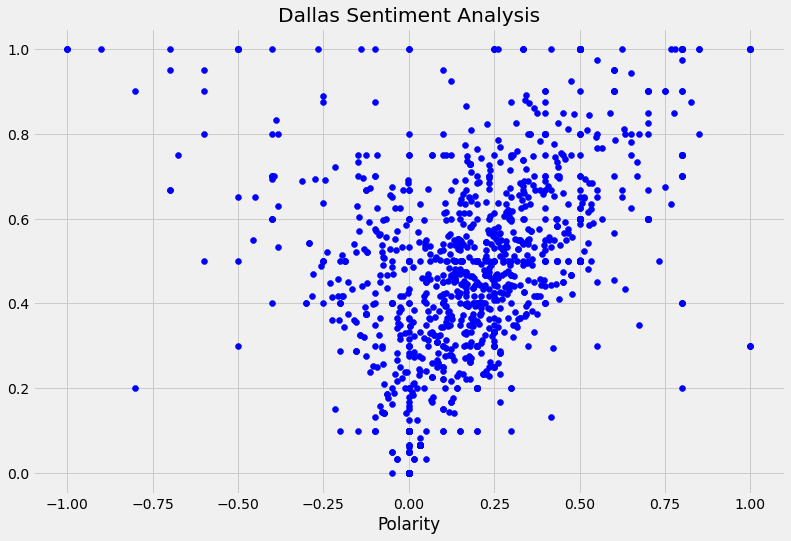

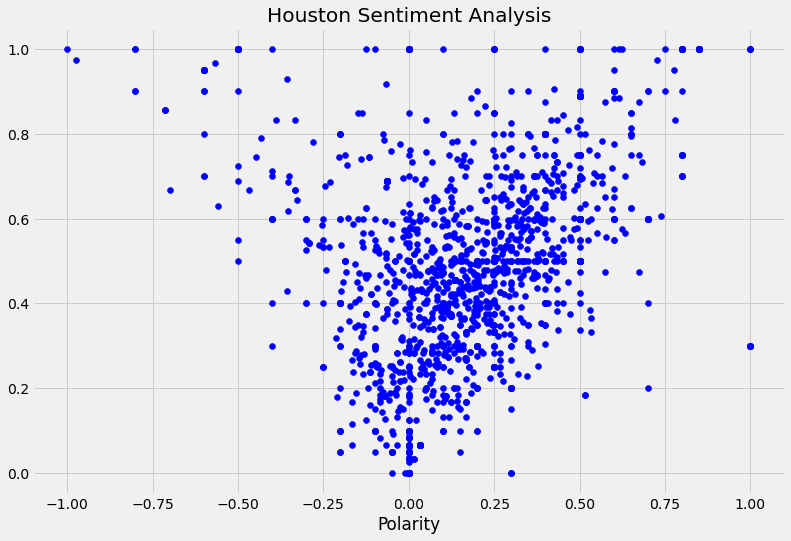

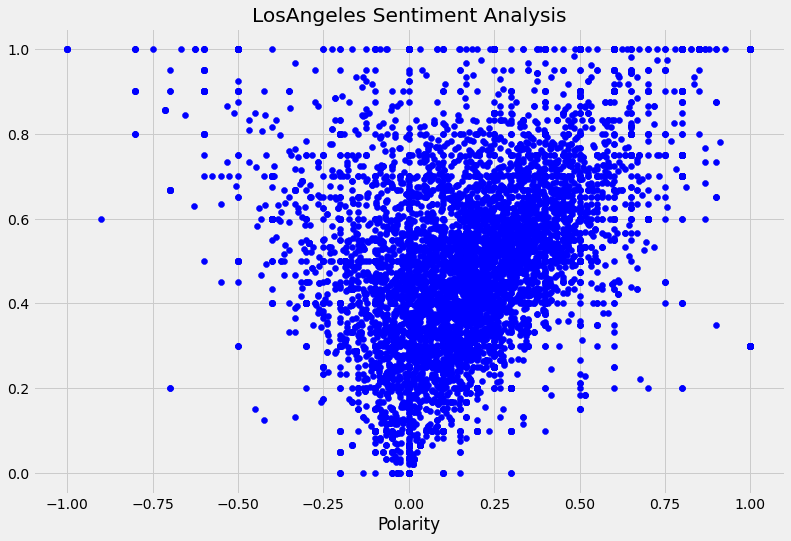

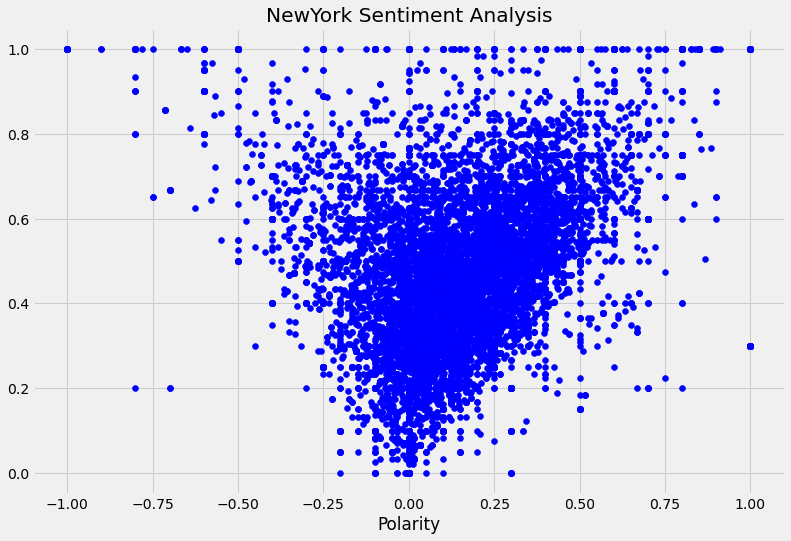

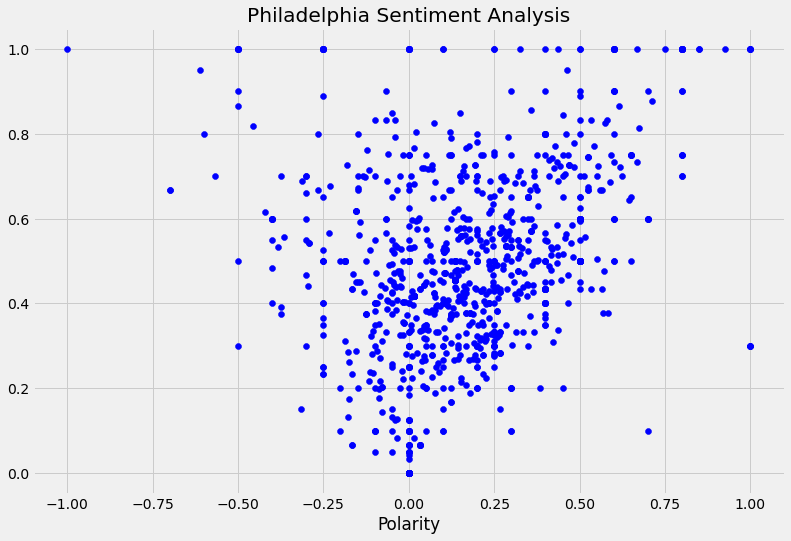

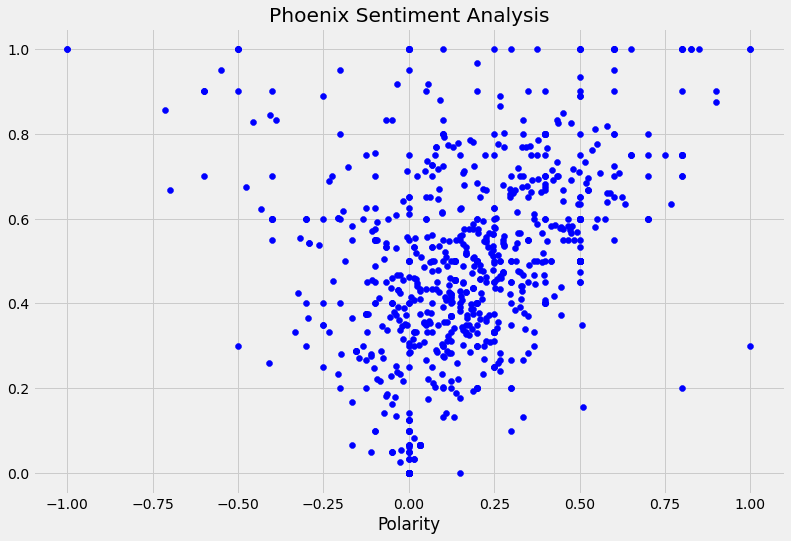

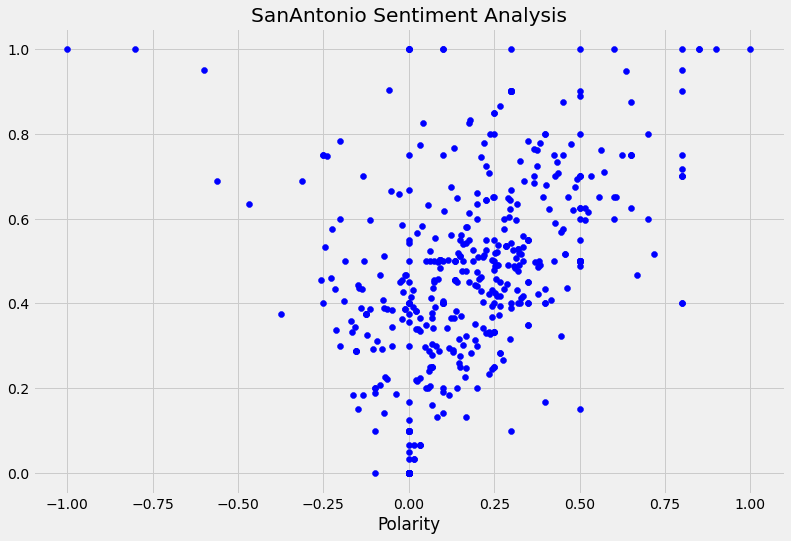

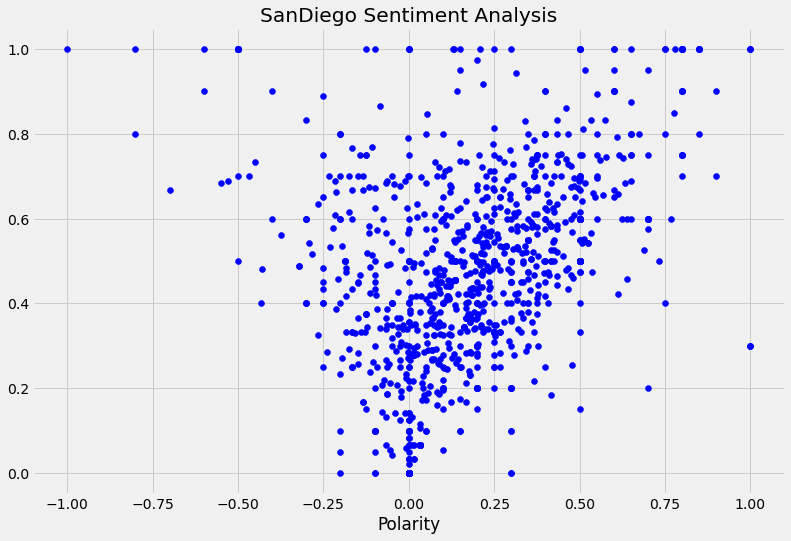

In [58]:
# plot the polarity and subjectivity

# 1 - Toronto Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,toronto_df_text.shape[0]):
    plt.scatter(toronto_df_text['polarity'][i],toronto_df_text['subjectivity'][i], color='Blue')
    
plt.title('Toronto Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 2 - Chicago Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,chicago_df_text.shape[0]):
    plt.scatter(chicago_df_text['polarity'][i],chicago_df_text['subjectivity'][i], color='Blue')
    
plt.title('Chicago Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 3 - Dallas Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,dallas_df_text.shape[0]):
    plt.scatter(dallas_df_text['polarity'][i],dallas_df_text['subjectivity'][i], color='Blue')
    
plt.title('Dallas Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 4 - Houston Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,houston_df_text.shape[0]):
    plt.scatter(houston_df_text['polarity'][i],houston_df_text['subjectivity'][i], color='Blue')
    
plt.title('Houston Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 5 - LosAngeles Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,losangeles_df_text.shape[0]):
    plt.scatter(losangeles_df_text['polarity'][i],losangeles_df_text['subjectivity'][i], color='Blue')
    
plt.title('LosAngeles Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 6 - NewYork Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,newyork_df_text.shape[0]):
    plt.scatter(newyork_df_text['polarity'][i],newyork_df_text['subjectivity'][i], color='Blue')
    
plt.title('NewYork Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 7 - Philadelphia Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,philadelphia_df_text.shape[0]):
    plt.scatter(philadelphia_df_text['polarity'][i],philadelphia_df_text['subjectivity'][i], color='Blue')
    
plt.title('Philadelphia Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 8 - Phoenix Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,phoenix_df_text.shape[0]):
    plt.scatter(phoenix_df_text['polarity'][i],phoenix_df_text['subjectivity'][i], color='Blue')
    
plt.title('Phoenix Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 9 - SanAntonio Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,sanantonio_df_text.shape[0]):
    plt.scatter(sanantonio_df_text['polarity'][i],sanantonio_df_text['subjectivity'][i], color='Blue')
    
plt.title('SanAntonio Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

# 10 - SanDiego Sentiment Plot
plt.figure(figsize=(12,8))
for i in range(0,sandiego_df_text.shape[0]):
    plt.scatter(sandiego_df_text['polarity'][i],sandiego_df_text['subjectivity'][i], color='Blue')
    
plt.title('SanDiego Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()



## Overall picture: Positive, Negative, Neutral


In [269]:
#Get the percentages: Positive, Negative, Neutral

# 1 Toronto Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = toronto_df_text[toronto_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /toronto_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = toronto_df_text[toronto_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / toronto_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
toronto_df_text['analysis'].value_counts()


--> percentage of positive tweets: 50.3 %
--> percentage of negative tweets: 14.4 %
--> percentage of positive tweets: 53.0 %
--> percentage of negative tweets: 16.9 %


Positive    1634
Neutral      927
Negative     521
Name: analysis, dtype: int64

In [185]:
# 2 Chicago Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = chicago_df_text[chicago_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /chicago_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = chicago_df_text[chicago_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / chicago_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
chicago_df_text['analysis'].value_counts()


# 3 Dallas Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = dallas_df_text[dallas_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /dallas_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = dallas_df_text[dallas_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / dallas_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
dallas_df_text['analysis'].value_counts()



# 4 Houston Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = houston_df_text[houston_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /houston_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = houston_df_text[chicago_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / houston_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
houston_df_text['analysis'].value_counts()


# 5 LosAngeles Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = losangeles_df_text[losangeles_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /losangeles_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = losangeles_df_text[losangeles_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / losangeles_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
losangeles_df_text['analysis'].value_counts()


# 6 NewYork Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = newyork_df_text[newyork_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /newyork_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = newyork_df_text[newyork_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / newyork_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
newyork_df_text['analysis'].value_counts()


# 7 Philadelphia Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = philadelphia_df_text[philadelphia_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /philadelphia_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = philadelphia_df_text[philadelphia_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / chicago_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
philadelphia_df_text['analysis'].value_counts()


# 8 Phoenix Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = phoenix_df_text[phoenix_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /phoenix_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = phoenix_df_text[phoenix_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / phoenix_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
phoenix_df_text['analysis'].value_counts()


# 9 SanAntonio Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = sanantonio_df_text[sanantonio_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /sanantonio_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = sanantonio_df_text[sanantonio_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / sanantonio_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
sanantonio_df_text['analysis'].value_counts()


# 10 SanDiego Positive-Negative Tweets
# Percentage of Positive Tweets
ptweets = sandiego_df_text[sandiego_df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /sandiego_df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")

# Get the percentage of negative tweets
ntweets = sandiego_df_text[sandiego_df_text.analysis == 'Negative']
ntweets = ntweets['text']

# Percentage of Negative Tweets
negativetweets = round( (ntweets.shape[0] / sandiego_df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")

#Show the value counts
sandiego_df_text['analysis'].value_counts()



--> percentage of positive tweets: 52.9 %
--> percentage of negative tweets: 16.8 %
--> percentage of positive tweets: 60.0 %
--> percentage of negative tweets: 14.4 %
--> percentage of positive tweets: 55.1 %
--> percentage of negative tweets: 16.7 %
--> percentage of positive tweets: 52.2 %
--> percentage of negative tweets: 16.9 %
--> percentage of positive tweets: 52.9 %
--> percentage of negative tweets: 21.1 %
--> percentage of positive tweets: 55.0 %
--> percentage of negative tweets: 7.2 %
--> percentage of positive tweets: 56.6 %
--> percentage of negative tweets: 15.7 %
--> percentage of positive tweets: 58.3 %
--> percentage of negative tweets: 12.6 %
--> percentage of positive tweets: 58.5 %
--> percentage of negative tweets: 15.7 %


Positive    796
Neutral     350
Negative    214
Name: analysis, dtype: int64

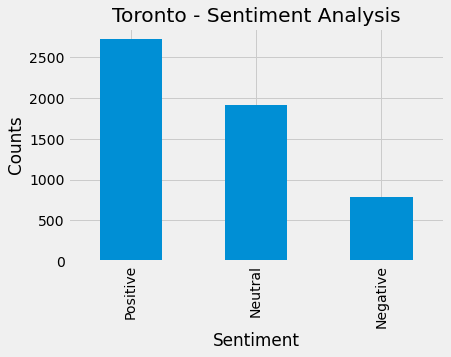

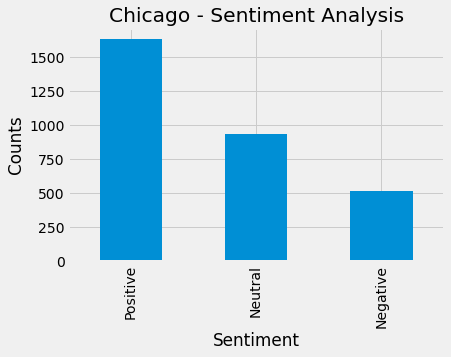

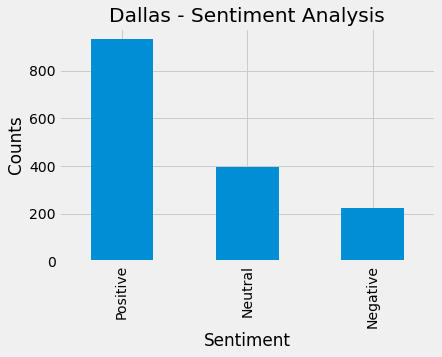

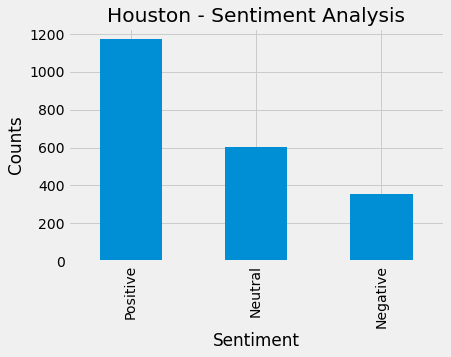

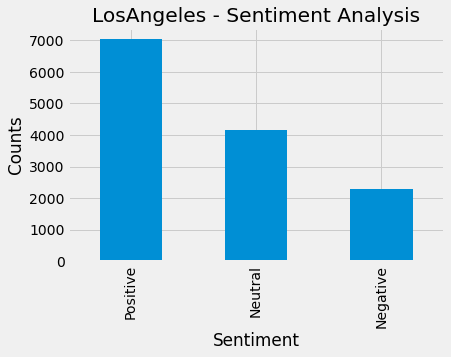

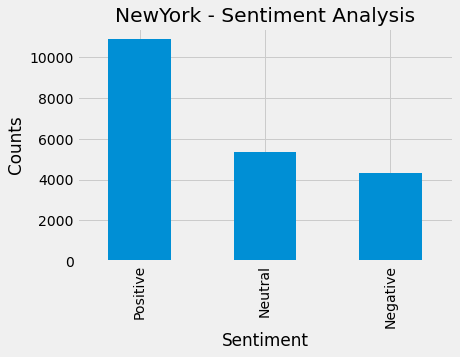

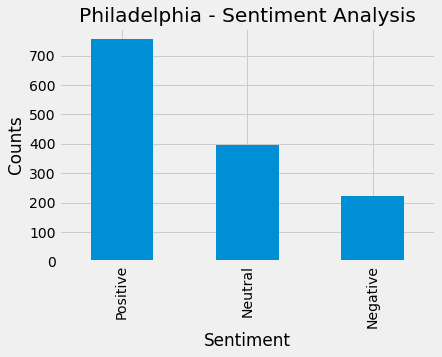

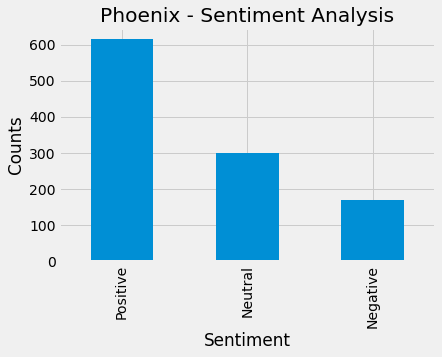

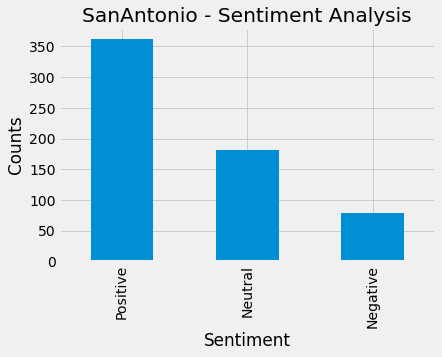

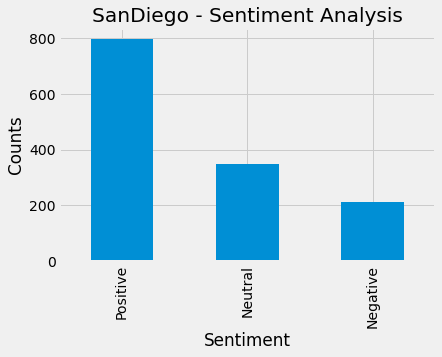

In [60]:
# 1 Toronto plot and visualize the counts
plt.title('Toronto - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
toronto_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')

# 2 Chicago plot and visualize the counts
plt.title('Chicago - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
chicago_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')

# 3 Dallas plot and visualize the counts
plt.title('Dallas - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dallas_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')


# 4 Houston plot and visualize the counts
plt.title('Houston - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
houston_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')

# 5 LosAngeles plot and visualize the counts
plt.title('LosAngeles - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
losangeles_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')

# 6 NewYork plot and visualize the counts
plt.title('NewYork - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
newyork_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')

# 7 Philadelphia plot and visualize the counts
plt.title('Philadelphia - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
philadelphia_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')

# 8 Phoenix plot and visualize the counts
plt.title('Phoenix - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
phoenix_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')

# 9 SanAntonio plot and visualize the counts
plt.title('SanAntonio - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
sanantonio_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')

# 10 SanDiego plot and visualize the counts
plt.title('SanDiego - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
sandiego_df_text['analysis'].value_counts().plot(kind='bar')
plt.show('Sentiment')




## B- Word Level Analysis

### B.1 Define Tokenized Tweets

In [152]:
# download and impot nltk library

import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

In [153]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [154]:
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

toronto_df_text['tokenized_tw'] = toronto_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
chicago_df_text['tokenized_tw'] = chicago_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
dallas_df_text['tokenized_tw'] = dallas_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
houston_df_text['tokenized_tw'] = houston_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
losangeles_df_text['tokenized_tw'] = losangeles_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
newyork_df_text['tokenized_tw'] = newyork_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
philadelphia_df_text['tokenized_tw'] = philadelphia_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
phoenix_df_text['tokenized_tw'] = phoenix_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
sanantonio_df_text['tokenized_tw'] = sanantonio_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
sandiego_df_text['tokenized_tw'] = sandiego_df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


# toronto_df_text['tokenized_tw'] = toronto_df_text['tokenized_tw'].tolist()

In [155]:
# convert to lower case
#toronto_df_text = toronto_df_text.apply(lambda x: x.astype(str).str.lower())
#toronto_df_text.head(1)

### B. 2 Apply Filters - Find/Remove Stopwords

In [156]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [157]:
#toronto_df_text.head(2)
#type(toronto_df_text['tokenized_tw'])

In [158]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
   
    # x = '[ "A","B","C" , " D"]'     
    # TokenList = str(TokenList)
    
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          

nRecords = toronto_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(toronto_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        toronto_df_text['tokenized_tw'][x] = remove_stopwords(toronto_df_text['tokenized_tw'][x])





In [159]:
# Remove 1 letter tokens
# toronto_df_text['tokenized_tw'] = toronto_df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

#toronto_df_text.head(2)

In [160]:
nRecords = chicago_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(chicago_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        chicago_df_text['tokenized_tw'][x] = remove_stopwords(chicago_df_text['tokenized_tw'][x])

In [161]:
nRecords = dallas_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(dallas_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        dallas_df_text['tokenized_tw'][x] = remove_stopwords(dallas_df_text['tokenized_tw'][x])

In [162]:
nRecords = houston_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(houston_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        houston_df_text['tokenized_tw'][x] = remove_stopwords(houston_df_text['tokenized_tw'][x])

In [163]:
nRecords = losangeles_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(losangeles_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        losangeles_df_text['tokenized_tw'][x] = remove_stopwords(losangeles_df_text['tokenized_tw'][x])

In [164]:
nRecords = newyork_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(newyork_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        newyork_df_text['tokenized_tw'][x] = remove_stopwords(newyork_df_text['tokenized_tw'][x])

In [165]:
nRecords = philadelphia_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(philadelphia_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        philadelphia_df_text['tokenized_tw'][x] = remove_stopwords(philadelphia_df_text['tokenized_tw'][x])

In [166]:
nRecords = phoenix_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(phoenix_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        phoenix_df_text['tokenized_tw'][x] = remove_stopwords(phoenix_df_text['tokenized_tw'][x])

In [167]:
nRecords = sanantonio_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(sanantonio_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        sanantonio_df_text['tokenized_tw'][x] = remove_stopwords(sanantonio_df_text['tokenized_tw'][x])

In [168]:
nRecords = sandiego_df_text['tokenized_tw'].count()

# nRecords = 3
# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(sandiego_df_text['tokenized_tw'][x],str)):
        # tokenListHere = toronto_df_text['tokenized_tw'][0].split(",")
        sandiego_df_text['tokenized_tw'][x] = remove_stopwords(sandiego_df_text['tokenized_tw'][x])

## B.2 Apply Filters - stemming words

In [169]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [170]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)


nRecords_toronto = toronto_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_toronto in range(nRecords_toronto-1):
    toronto_df_text['tokenized_tw'][x_toronto] = applyporter(toronto_df_text['tokenized_tw'][x_toronto])

nRecords_chicago = chicago_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_chicago in range(nRecords_chicago-1):
    chicago_df_text['tokenized_tw'][x_chicago] = applyporter(chicago_df_text['tokenized_tw'][x_chicago])

    

In [171]:
nRecords_dallas = dallas_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_dallas in range(nRecords_dallas-1):
    dallas_df_text['tokenized_tw'][x_dallas] = applyporter(dallas_df_text['tokenized_tw'][x_dallas])

nRecords_houston = houston_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_houston in range(nRecords_houston-1):
    houston_df_text['tokenized_tw'][x_houston] = applyporter(houston_df_text['tokenized_tw'][x_houston])

nRecords_losangeles = losangeles_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_losangeles in range(nRecords_losangeles-1):
    losangeles_df_text['tokenized_tw'][x_losangeles] = applyporter(losangeles_df_text['tokenized_tw'][x_losangeles])

nRecords_newyork = newyork_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_newyork in range(nRecords_newyork-1):
    newyork_df_text['tokenized_tw'][x_newyork] = applyporter(newyork_df_text['tokenized_tw'][x_newyork])

nRecords_philadelphia = philadelphia_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_philadelphia in range(nRecords_philadelphia-1):
    philadelphia_df_text['tokenized_tw'][x_philadelphia] = applyporter(philadelphia_df_text['tokenized_tw'][x_philadelphia])

nRecords_phoenix = phoenix_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_phoenix in range(nRecords_phoenix-1):
    phoenix_df_text['tokenized_tw'][x_phoenix] = applyporter(phoenix_df_text['tokenized_tw'][x_phoenix])

nRecords_sanantonio = sanantonio_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_sanantonio in range(nRecords_sanantonio-1):
    sanantonio_df_text['tokenized_tw'][x_sanantonio] = applyporter(sanantonio_df_text['tokenized_tw'][x_sanantonio])

nRecords_sandiego = sandiego_df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x_sandiego in range(nRecords_sandiego-1):
    sandiego_df_text['tokenized_tw'][x_sandiego] = applyporter(sandiego_df_text['tokenized_tw'][x_sandiego])
    

## Return the cleaned data into a sentence format

In [172]:
## combine word into a single sentence
for  i in range(nRecords_toronto):
    if isinstance(toronto_df_text['tokenized_tw'][i],list):
        toronto_df_text['tokenized_tw'][i] = " ".join(toronto_df_text['tokenized_tw'][i])
    

In [173]:
## combine word into a single sentence
for  i in range(nRecords_chicago):
    if isinstance(chicago_df_text['tokenized_tw'][i],list):
        chicago_df_text['tokenized_tw'][i] = " ".join(chicago_df_text['tokenized_tw'][i])


In [174]:
## combine word into a single sentence
for  i in range(nRecords_dallas):
    if isinstance(dallas_df_text['tokenized_tw'][i],list):
        dallas_df_text['tokenized_tw'][i] = " ".join(dallas_df_text['tokenized_tw'][i])
        
## combine word into a single sentence
for  i in range(nRecords_houston):
    if isinstance(houston_df_text['tokenized_tw'][i],list):
        houston_df_text['tokenized_tw'][i] = " ".join(houston_df_text['tokenized_tw'][i])
        
## combine word into a single sentence
for  i in range(nRecords_losangeles):
    if isinstance(losangeles_df_text['tokenized_tw'][i],list):
        losangeles_df_text['tokenized_tw'][i] = " ".join(losangeles_df_text['tokenized_tw'][i])
        
## combine word into a single sentence
for  i in range(nRecords_newyork):
    if isinstance(newyork_df_text['tokenized_tw'][i],list):
        newyork_df_text['tokenized_tw'][i] = " ".join(newyork_df_text['tokenized_tw'][i])
        
## combine word into a single sentence
for  i in range(nRecords_philadelphia):
    if isinstance(philadelphia_df_text['tokenized_tw'][i],list):
        philadelphia_df_text['tokenized_tw'][i] = " ".join(philadelphia_df_text['tokenized_tw'][i])        

## combine word into a single sentence
for  i in range(nRecords_phoenix):
    if isinstance(phoenix_df_text['tokenized_tw'][i],list):
        phoenix_df_text['tokenized_tw'][i] = " ".join(phoenix_df_text['tokenized_tw'][i])
        
## combine word into a single sentence
for  i in range(nRecords_sanantonio):
    if isinstance(sanantonio_df_text['tokenized_tw'][i],list):
        sanantonio_df_text['tokenized_tw'][i] = " ".join(sanantonio_df_text['tokenized_tw'][i])
        
## combine word into a single sentence
for  i in range(nRecords_sandiego):
    if isinstance(sandiego_df_text['tokenized_tw'][i],list):
        sandiego_df_text['tokenized_tw'][i] = " ".join(sandiego_df_text['tokenized_tw'][i])
        


In [175]:
toronto_df_text['text'] = toronto_df_text['text'].apply(cleanTweets)
toronto_df_text['text'] = toronto_df_text['text'].apply(cleanEmoji)

## Create a WordCloud from cleaned tweets


In [176]:
#chicago_df_text.head(2)

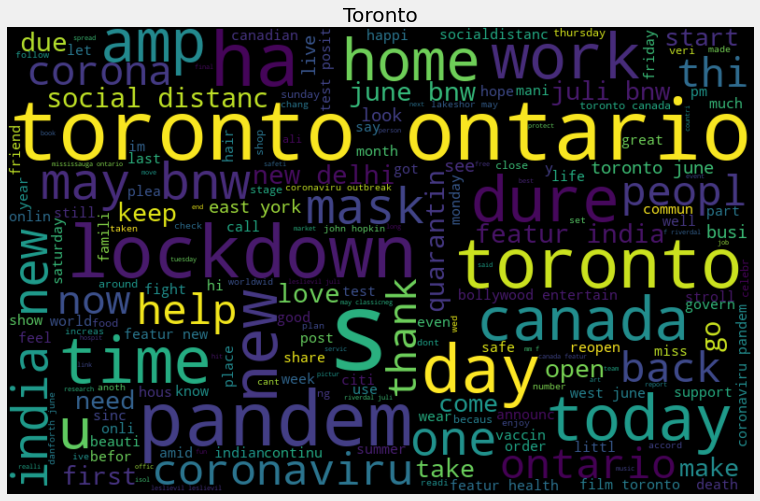

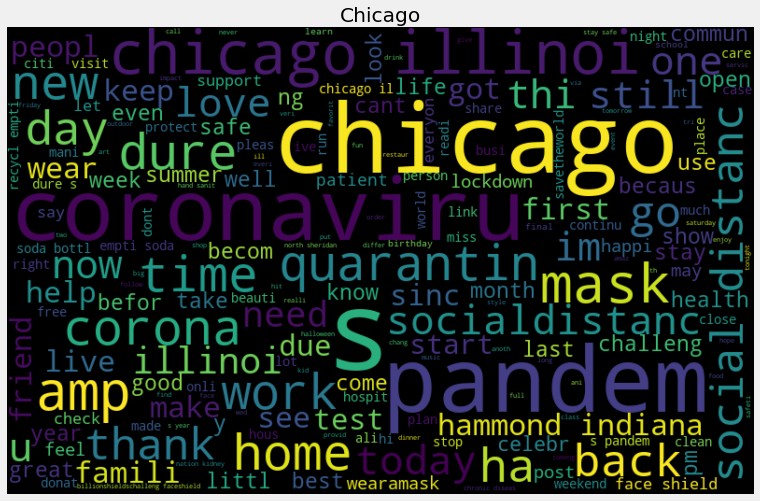

In [177]:
# visualize the most frequency used words using wordcloud

# Toronto - revisit wordcloud after cleaning
allWords_toronto = ' '.join(twts_toronto for twts_toronto in toronto_df_text['tokenized_tw'])
wordCloud_toronto = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_toronto)
# Toronto - size the plt object
plt.figure(figsize=(19,8))
plt.title('Toronto')
plt.imshow(wordCloud_toronto, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Chicago - revisit wordcloud after cleaning
allWords_chicago = ' '.join(twts_chicago for twts_chicago in chicago_df_text['tokenized_tw'])   
wordCloud_chicago = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords_chicago)
# Toronto - size the plt object
plt.figure(figsize=(19,8))
plt.title('Chicago')
plt.imshow(wordCloud_chicago, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [178]:
toronto_df_text.groupby(['place']).count
chicago_df_text.groupby(['place']).count
dallas_df_text.groupby(['place']).count
houston_df_text.groupby(['place']).count
losangeles_df_text.groupby(['place']).count
newyork_df_text.groupby(['place']).count
philadelphia_df_text.groupby(['place']).count
phoenix_df_text.groupby(['place']).count
sanantonio_df_text.groupby(['place']).count
sandiego_df_text.groupby(['place']).count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f5b6a74e190>>

In [179]:
from datetime import datetime
from dateutil.parser import parse


In [180]:
#create a new column for date only
toronto_df_text['date'] = toronto_df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    toronto_df_text['date'][x] = datetime.strptime(toronto_df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
  
# Extract month from the data variable, Add a new column
toronto_df_text['month']  = pd.DatetimeIndex(toronto_df_text['date']).month

In [181]:
#create a new column for date only
chicago_df_text['date'] = chicago_df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    chicago_df_text['date'][x] = datetime.strptime(chicago_df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
  
# Extract month from the data variable, Add a new column
chicago_df_text['month']  = pd.DatetimeIndex(chicago_df_text['date']).month


In [182]:
##create a new column for date only
dallas_df_text['date'] = dallas_df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    dallas_df_text['date'][x] = datetime.strptime(dallas_df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
  
# Extract month from the data variable, Add a new column
dallas_df_text['month']  = pd.DatetimeIndex(dallas_df_text['date']).month


##create a new column for date only
houston_df_text['date'] = houston_df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    houston_df_text['date'][x] = datetime.strptime(houston_df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
  
# Extract month from the data variable, Add a new column
houston_df_text['month']  = pd.DatetimeIndex(houston_df_text['date']).month


##create a new column for date only
losangeles_df_text['date'] = losangeles_df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    losangeles_df_text['date'][x] = datetime.strptime(losangeles_df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
  
# Extract month from the data variable, Add a new column
losangeles_df_text['month']  = pd.DatetimeIndex(losangeles_df_text['date']).month


##create a new column for date only
newyork_df_text['date'] = newyork_df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    newyork_df_text['date'][x] = datetime.strptime(newyork_df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
  
# Extract month from the data variable, Add a new column
newyork_df_text['month']  = pd.DatetimeIndex(newyork_df_text['date']).month


##create a new column for date only
philadelphia_df_text['date'] = philadelphia_df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    philadelphia_df_text['date'][x] = datetime.strptime(philadelphia_df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
  
# Extract month from the data variable, Add a new column
philadelphia_df_text['month']  = pd.DatetimeIndex(philadelphia_df_text['date']).month


In [188]:
##create a new column for date only
sandiego_df_text['date'] = sandiego_df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    sandiego_df_text['date'][x] = datetime.strptime(sandiego_df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
  
# Extract month from the data variable, Add a new column
sandiego_df_text['month']  = pd.DatetimeIndex(sandiego_df_text['date']).month

## Data preparation for further visualizations

In [201]:
# Group by place
# placesRecords = toronto_df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()

# 1 Toronto 
# remove ontario from place column
lista = toronto_df_text.place.str.split(",",expand=True)
toronto_df_text['place'] = lista [0]

# convert the polarity and subjectivity values to numbers
toronto_df_text["polarity"] = pd.to_numeric(toronto_df_text['polarity'])
toronto_df_text["subjectivity"] = pd.to_numeric(toronto_df_text['subjectivity'])

# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment_toronto = toronto_df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment_toronto = toronto_df_text.groupby('month', as_index=False)['polarity'].mean()

In [202]:
# 2 Chicago - 
lista = chicago_df_text.place.str.split(",",expand=True)
chicago_df_text['place'] = lista [0]

# convert the polarity and subjectivity values to numbers
chicago_df_text["polarity"] = pd.to_numeric(chicago_df_text['polarity'])
chicago_df_text["subjectivity"] = pd.to_numeric(chicago_df_text['subjectivity'])

# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment_chicago = chicago_df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment_chicago = chicago_df_text.groupby('month', as_index=False)['polarity'].mean()

In [210]:
# 2 Dallas - 

lista = dallas_df_text.place.str.split(",",expand=True)
dallas_df_text['place'] = lista [0]

# convert the polarity and subjectivity values to numbers
dallas_df_text["polarity"] = pd.to_numeric(dallas_df_text['polarity'])
dallas_df_text["subjectivity"] = pd.to_numeric(dallas_df_text['subjectivity'])

# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment_dallas = dallas_df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment_dallas = dallas_df_text.groupby('month', as_index=False)['polarity'].mean()

In [204]:
# 2 Houston - 

lista = houston_df_text.place.str.split(",",expand=True)
houston_df_text['place'] = lista [0]

# convert the polarity and subjectivity values to numbers
houston_df_text["polarity"] = pd.to_numeric(houston_df_text['polarity'])
houston_df_text["subjectivity"] = pd.to_numeric(houston_df_text['subjectivity'])

# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment_houston = houston_df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment_houston = houston_df_text.groupby('month', as_index=False)['polarity'].mean()

In [205]:
# 2 losangeles - 
lista = losangeles_df_text.place.str.split(",",expand=True)
losangeles_df_text['place'] = lista [0]

# convert the polarity and subjectivity values to numbers
losangeles_df_text["polarity"] = pd.to_numeric(losangeles_df_text['polarity'])
losangeles_df_text["subjectivity"] = pd.to_numeric(losangeles_df_text['subjectivity'])

# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment_losangeles = losangeles_df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment_losangeles = losangeles_df_text.groupby('month', as_index=False)['polarity'].mean()

In [206]:
# 2 newyork - 
lista = newyork_df_text.place.str.split(",",expand=True)
newyork_df_text['place'] = lista [0]

# convert the polarity and subjectivity values to numbers
newyork_df_text["polarity"] = pd.to_numeric(newyork_df_text['polarity'])
newyork_df_text["subjectivity"] = pd.to_numeric(newyork_df_text['subjectivity'])

# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment_newyork = newyork_df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment_newyork = newyork_df_text.groupby('month', as_index=False)['polarity'].mean()

In [207]:
# 2 Philadelphia - 
lista = philadelphia_df_text.place.str.split(",",expand=True)
philadelphia_df_text['place'] = lista [0]

# convert the polarity and subjectivity values to numbers
philadelphia_df_text["polarity"] = pd.to_numeric(philadelphia_df_text['polarity'])
philadelphia_df_text["subjectivity"] = pd.to_numeric(philadelphia_df_text['subjectivity'])

# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment_philadelphia = philadelphia_df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment_philadelphia = philadelphia_df_text.groupby('month', as_index=False)['polarity'].mean()

In [208]:
# 2 SanDiego - 
lista = sandiego_df_text.place.str.split(",",expand=True)
sandiego_df_text['place'] = lista [0]

# convert the polarity and subjectivity values to numbers
sandiego_df_text["polarity"] = pd.to_numeric(sandiego_df_text['polarity'])
sandiego_df_text["subjectivity"] = pd.to_numeric(sandiego_df_text['subjectivity'])

# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment_sandiego = sandiego_df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment_sandiego = sandiego_df_text.groupby('month', as_index=False)['polarity'].mean()

<AxesSubplot:ylabel='place'>

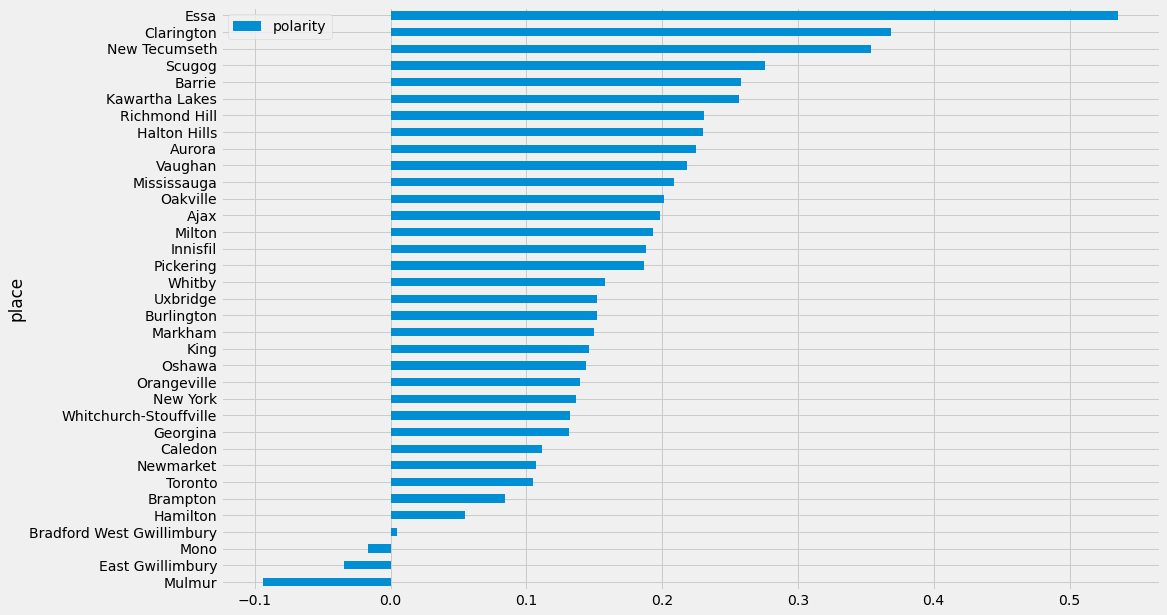

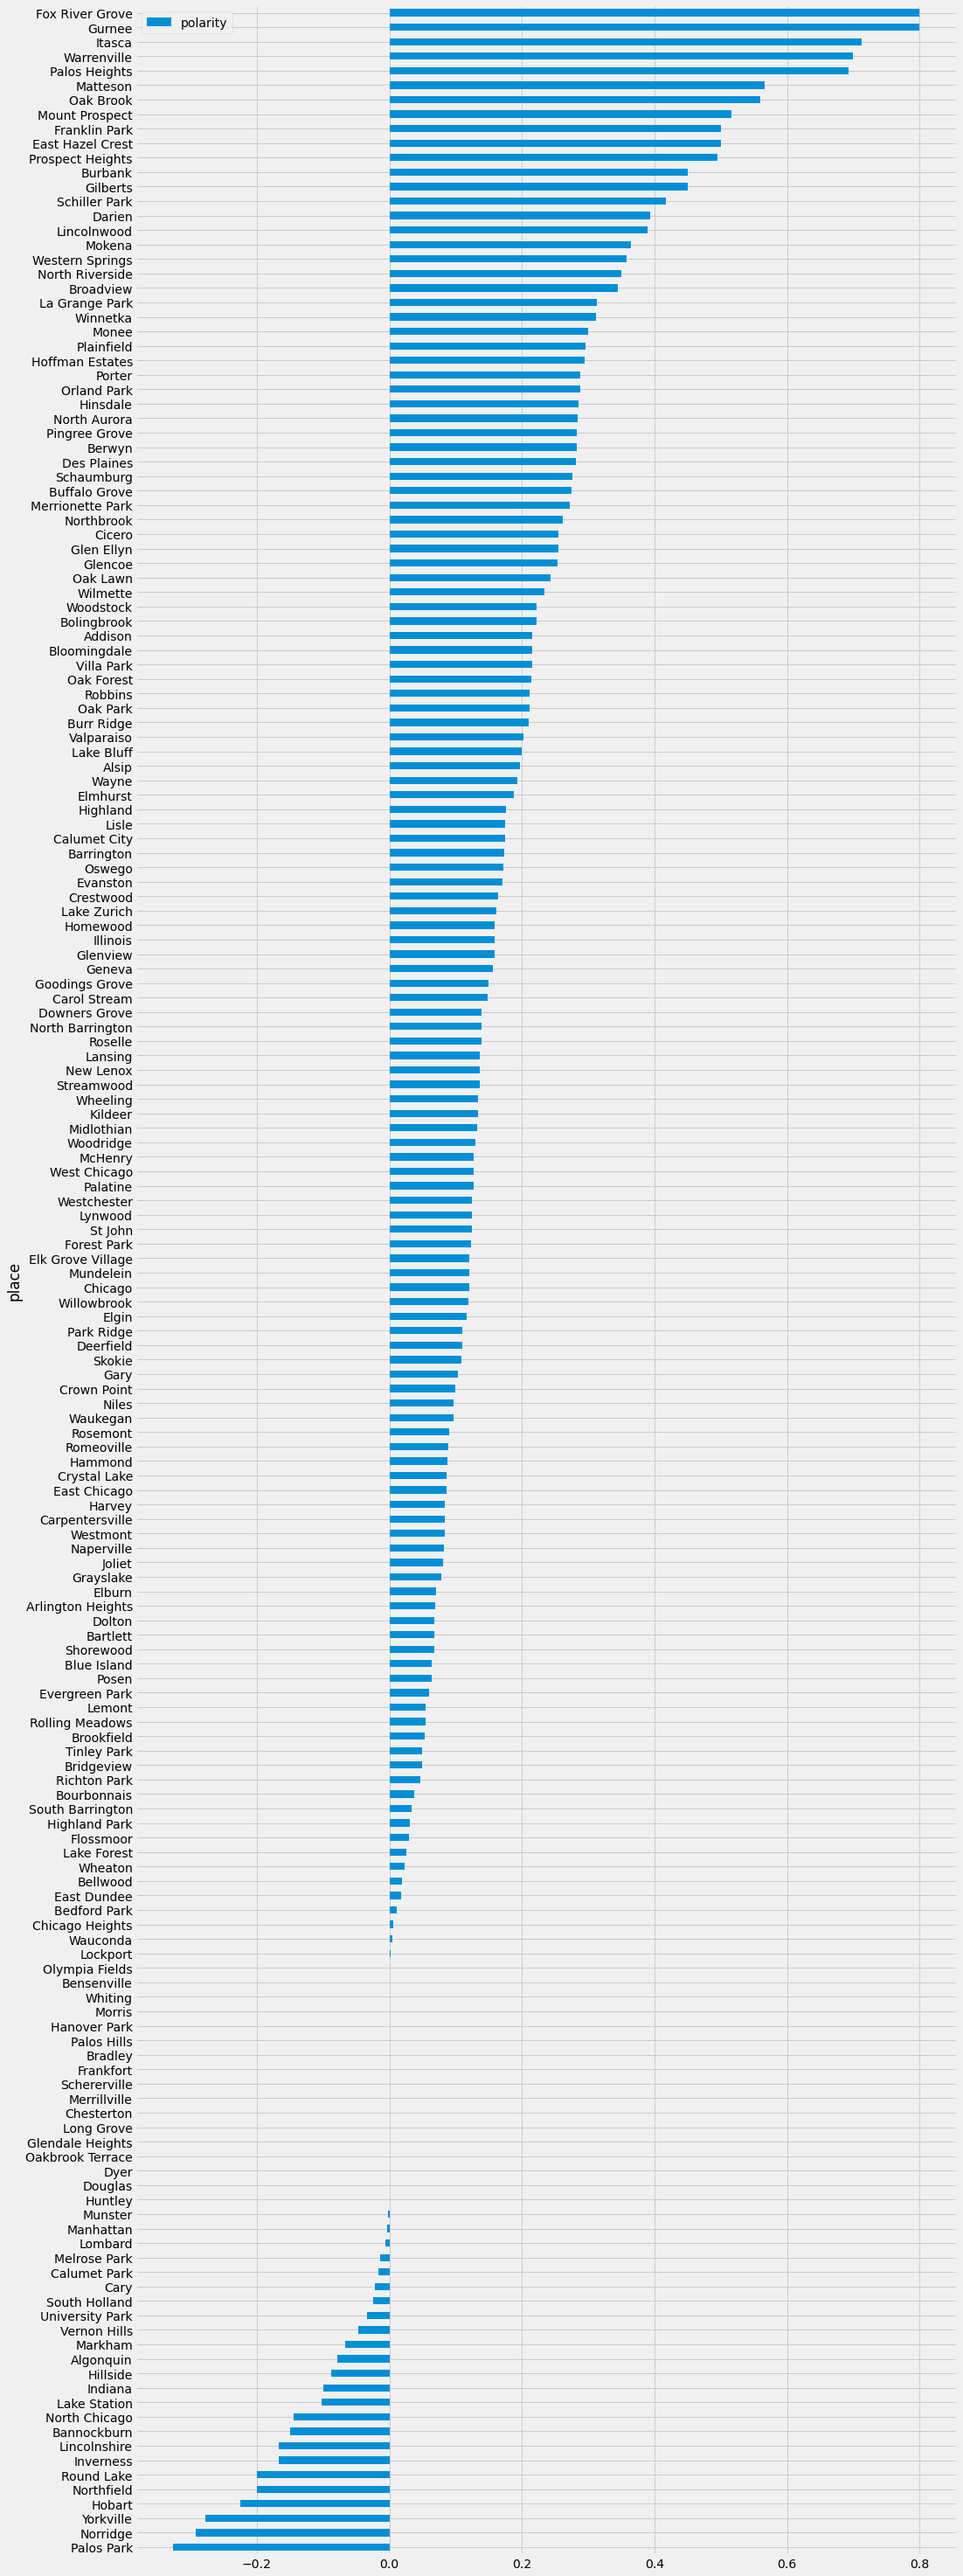

In [211]:
# Chart sentiments based on regions

#df_region_sentiment_toronto["polarity"] = pd.to_numeric(df_region_sentiment_toronto['polarity'])
df_region_sentiment_toronto.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 10))

df_region_sentiment_chicago.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 50))


In [332]:
df_time_sentiment.head(5)

month  polarity
0      3  0.096624
1      4  0.136342
2      5  0.127804
3      6  0.115753
4      7  0.126581

<AxesSubplot:title={'center':'SanDiego'}, xlabel='month'>

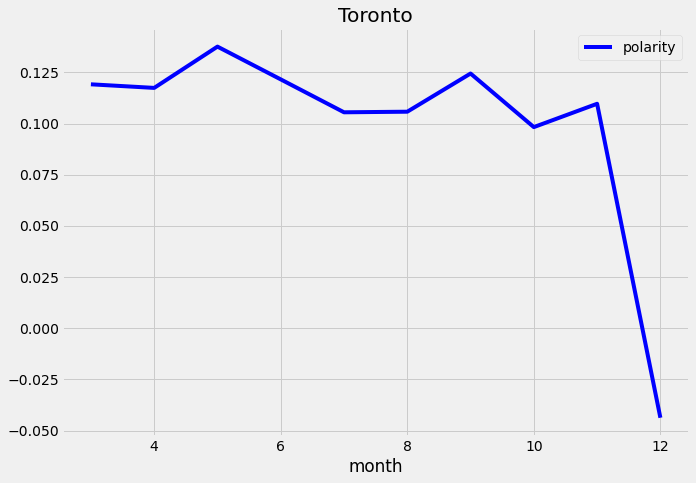

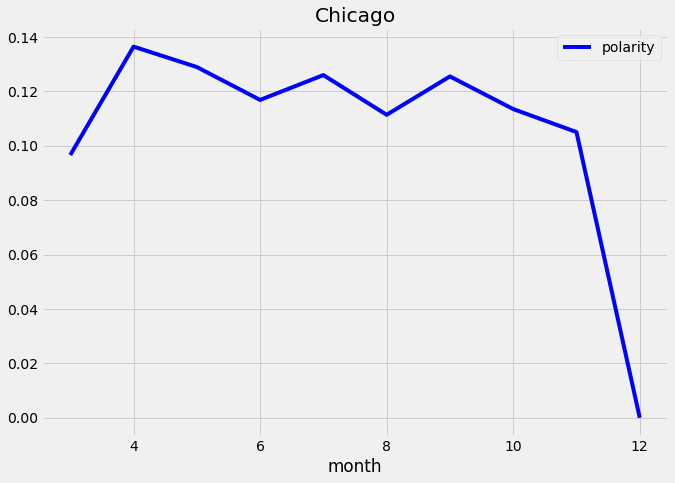

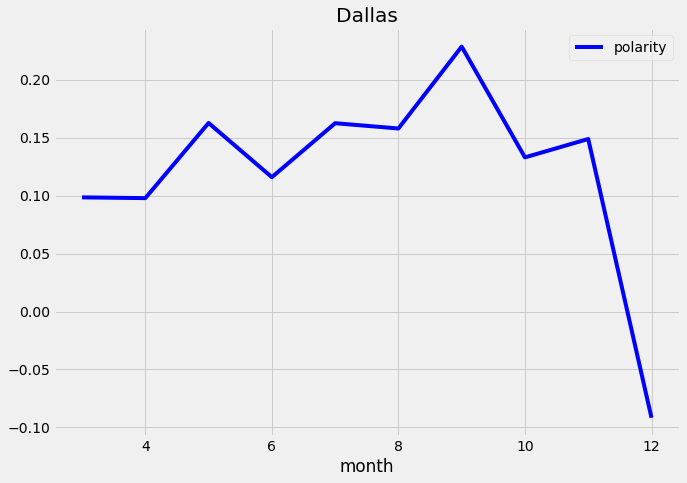

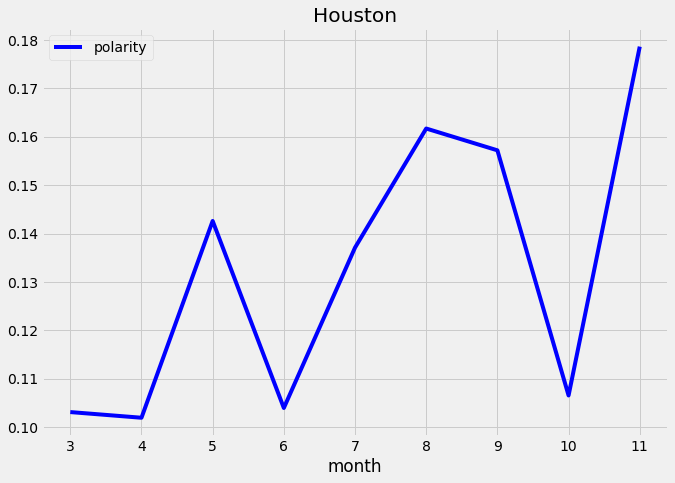

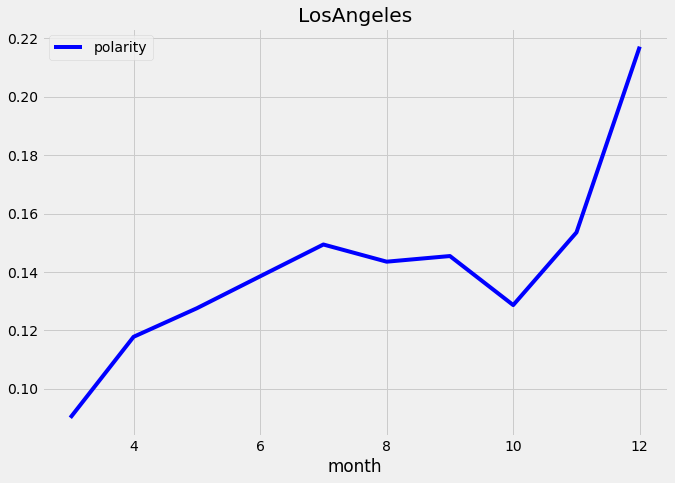

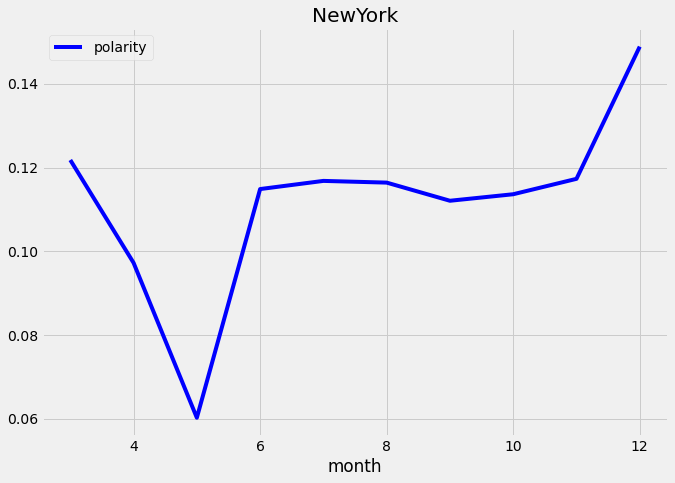

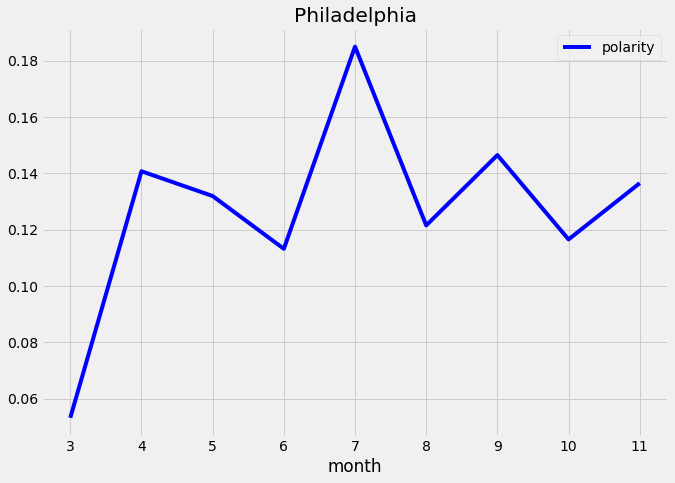

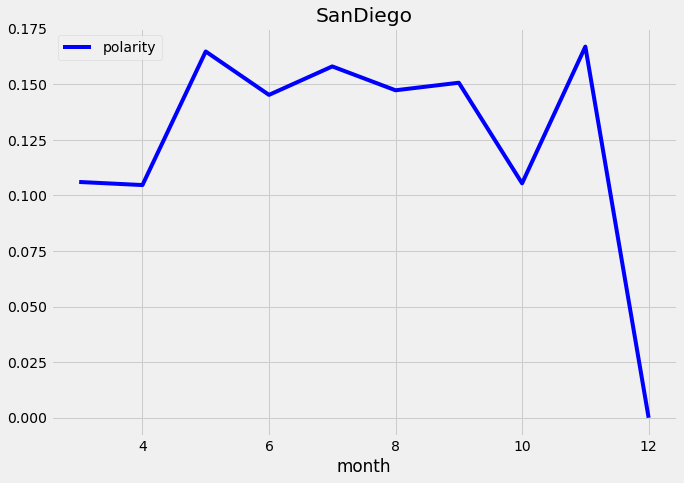

In [215]:
# Chart sentiments based on regions

df_time_sentiment_toronto.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(10, 7), color="blue",title='Toronto')

df_time_sentiment_chicago.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(10, 7), color="blue",title='Chicago')

df_time_sentiment_dallas.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(10, 7), color="blue",title='Dallas')

df_time_sentiment_houston.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(10, 7), color="blue",title='Houston')
df_time_sentiment_losangeles.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(10, 7), color="blue",title='LosAngeles')
df_time_sentiment_newyork.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(10, 7), color="blue",title='NewYork')
df_time_sentiment_philadelphia.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(10, 7), color="blue",title='Philadelphia')



df_time_sentiment_sandiego.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(10, 7), color="blue",title='SanDiego')
